In [25]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# inogre warnings
import warnings
warnings.filterwarnings('ignore')

# report classification
from sklearn.metrics import classification_report

# 1. Đọc dữ liệu

In [26]:
df = pandas.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [28]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# 2. Trực quan hóa dữ liệu

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

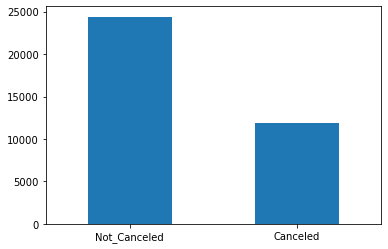

In [29]:
# plot df['booking_status']
df['booking_status'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

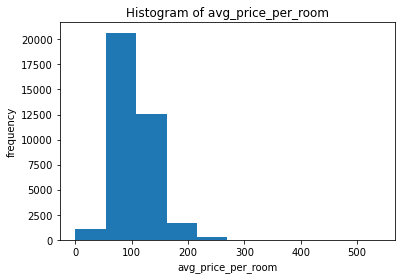

In [30]:
# plot hist of df['avg_price_per_room']
# df['avg_price_per_room'].hist()
# bỏ grid
df['avg_price_per_room'].hist(grid=False)
plt.xlabel('avg_price_per_room')
plt.ylabel('frequency')
plt.title('Histogram of avg_price_per_room')
plt.show()

Text(0.5, 1.0, 'avg_price_per_room')

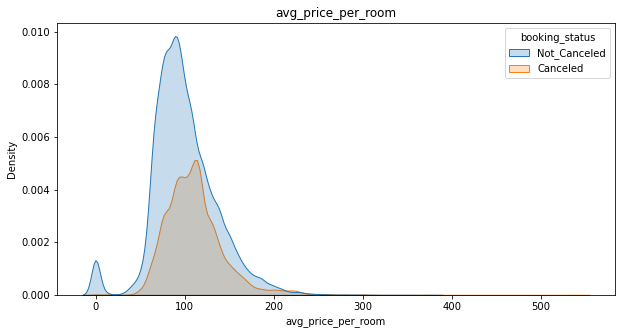

In [31]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x = 'avg_price_per_room', hue = 'booking_status', shade=True)
plt.title('avg_price_per_room')

In [32]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [33]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

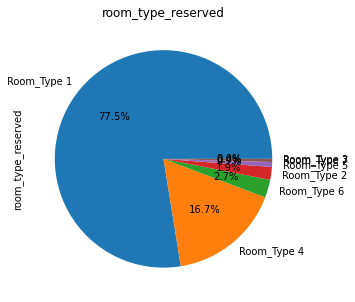

In [34]:
# pie chart
df['room_type_reserved'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
plt.title('room_type_reserved')
plt.show()

In [35]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [36]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

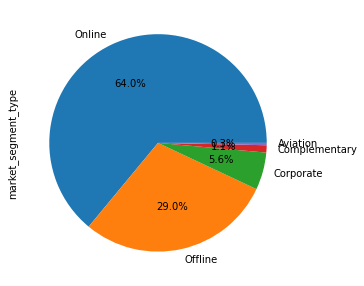

In [37]:
# pie plot
df['market_segment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))

Text(0.5, 1.0, 'market_segment_type vs booking_status')

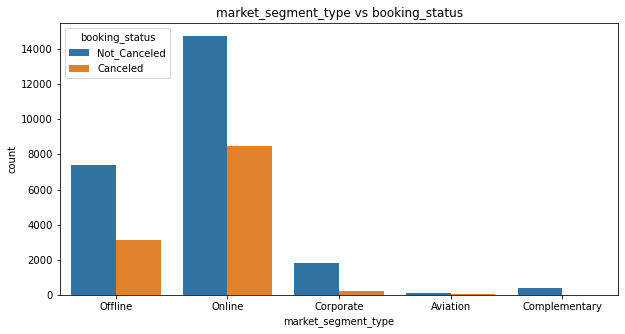

In [38]:
# market_segment_type vs booking_status
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'market_segment_type', hue = 'booking_status')
plt.title('market_segment_type vs booking_status')

In [39]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

Text(0.5, 1.0, 'repeated_guest vs booking_status')

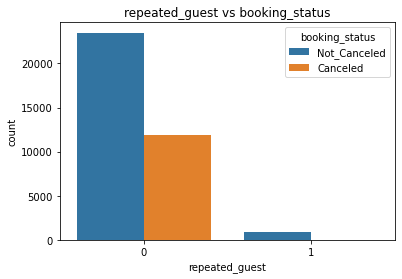

In [40]:
# repeated_guest vs booking_status
# plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'repeated_guest', hue = 'booking_status')
plt.title('repeated_guest vs booking_status')

In [41]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['booking_status'] = le.fit_transform(df['booking_status'])
df['type_of_meal_plan'] = le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = le.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = le.fit_transform(df['market_segment_type'])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [42]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['avg_price_per_room']] = scaler.fit_transform(df[['avg_price_per_room']])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,0.120370,0,1
1,INN00002,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,0.197556,1,1
2,INN00003,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,0.111111,0,0
3,INN00004,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,0.185185,0,0
4,INN00005,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,0.175000,0,0


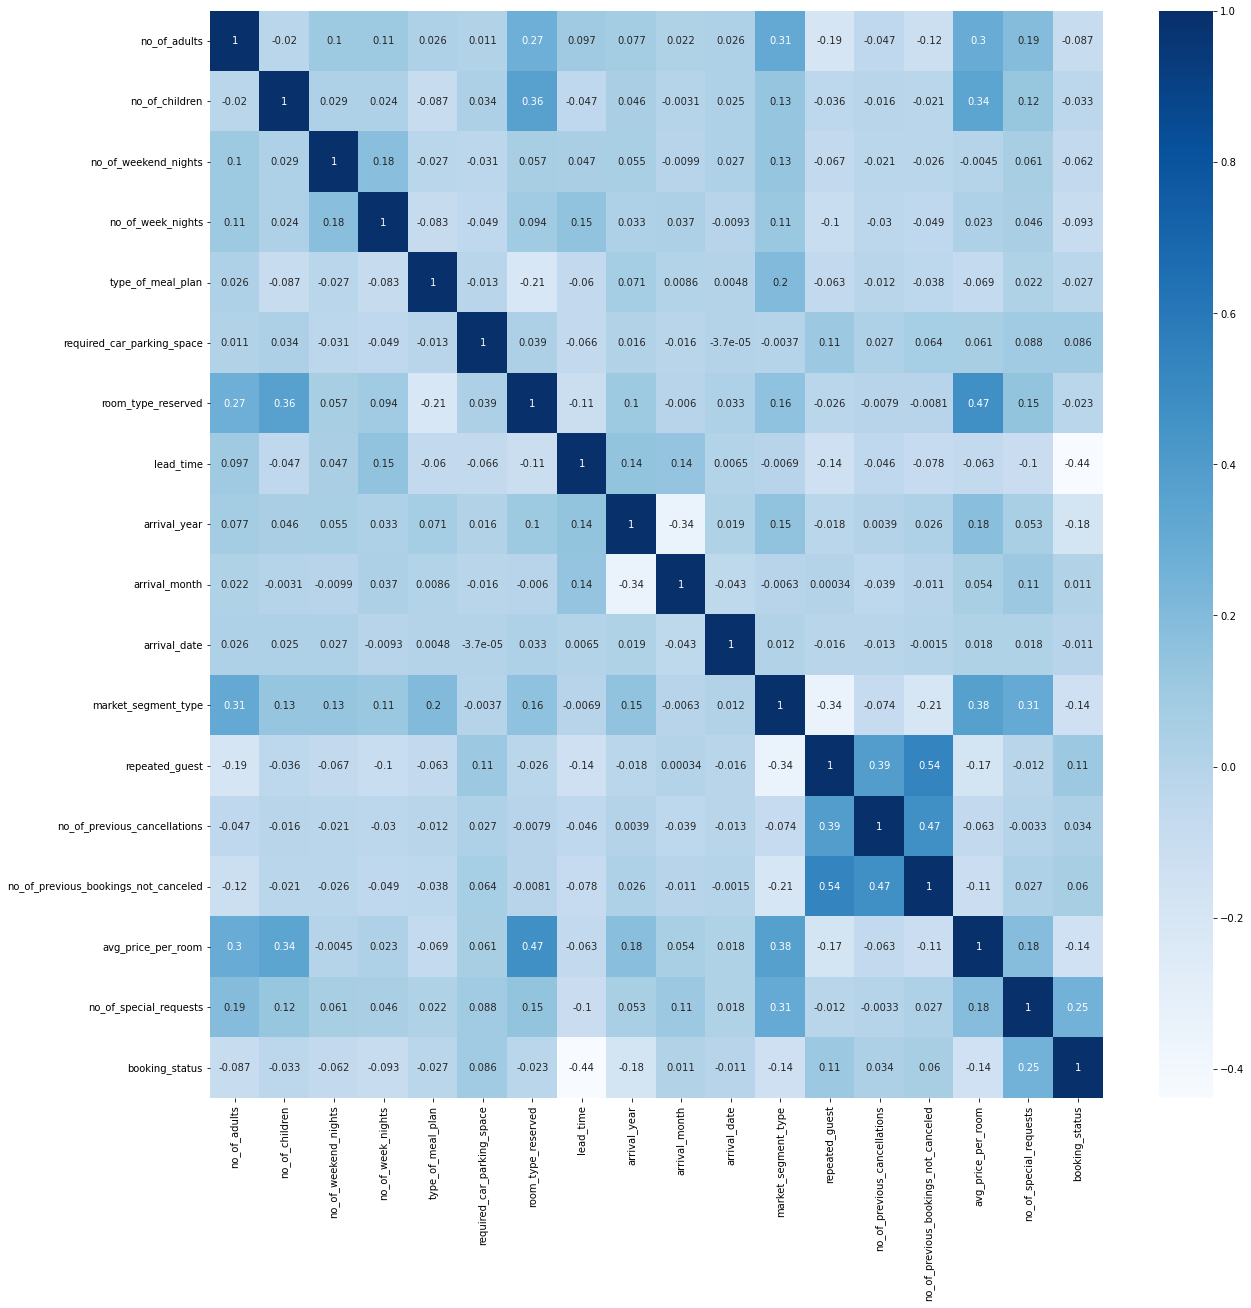

In [43]:
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [44]:
# lấy X tất cả các cột trừ cột booking_status, và booking_id
X = df.drop(['booking_status', 'Booking_ID'], axis=1)
y = df['booking_status']

In [62]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0, shuffle=True)

In [63]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Accuracy trước khi cân bằng

In [64]:
# accuracy trước khi cân bằng đối với RF với các tham số mặc định
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8805216659655027

In [65]:
# xử lý imbalanced data 
df_0 = df[df['booking_status'] == 0]
df_1 = df[df['booking_status'] == 1]
df_0.shape, df_1.shape

((11885, 19), (24390, 19))

In [66]:
n_samples = min(df_0.shape[0], df_1.shape[0])
df_0 = df_0.sample(n=n_samples, random_state=42)
df_1 = df_1.sample(n=n_samples, random_state=42)
# concat 2 dataframe
df_ = pandas.concat([df_0, df_1], axis=0)
df_.shape

(23770, 19)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

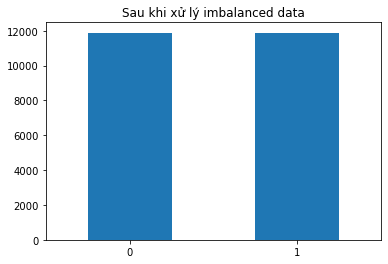

In [67]:
df_['booking_status'].value_counts().plot(kind='bar')
plt.title('Sau khi xử lý imbalanced data')
plt.xticks(rotation=0)

# 3. Sau khi xử lý mất cân bằng dữ liệu

In [68]:
X = df_.iloc[:, 1:-1]
y = df_['booking_status']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0, shuffle=True)
# random forest với các tham số mặc định
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.88122282989763

# 4. Tìm các tham số tôi ưu cho các mô hình

## 4.1 Decision Tree

In [69]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.8387322956107138

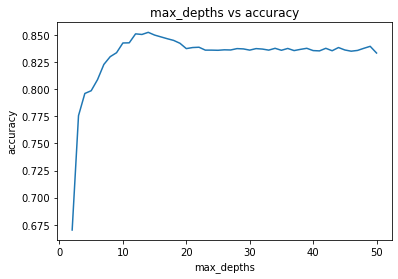

Max_depths =  14


In [70]:
# cho max_depth range(2, 51), mỗi giá trị tính accuracy rồi plot các giá trị
max_depths = range(2, 51)
accuracies = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(max_depths, accuracies)
plt.xlabel('max_depths')
plt.ylabel('accuracy')
plt.title('max_depths vs accuracy')
plt.show()

# in ra kết quả max_depth tốt nhất
print('Max_depths = ', max_depths[accuracies.index(max(accuracies))])

In [71]:
# thiết lập max_depth tốt nhất
max_depth = max_depths[accuracies.index(max(accuracies))]
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.8519141775347077

In [72]:
# chạy 10 lần decision tree lấy trung bình dưới dạng %
from sklearn.tree import DecisionTreeClassifier
import random
for i in range(10):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    random_state = random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=random_state, shuffle=True)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    # accuracy
    print('scores: ', accuracy_score(y_test, y_pred)*100)
    print('------------------')

scores:  84.658533165054
------------------
scores:  85.09325480297294
------------------
scores:  85.55602299817697
------------------
scores:  84.98106857383256
------------------
scores:  84.51830037862852
------------------
scores:  85.4718833263217
------------------
scores:  85.58406955546207
------------------
scores:  85.85051184967045
------------------
scores:  85.55602299817697
------------------
scores:  84.72864955826672
------------------


In [73]:
# dt
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3515
           1       0.85      0.84      0.85      3616

    accuracy                           0.85      7131
   macro avg       0.85      0.85      0.85      7131
weighted avg       0.85      0.85      0.85      7131



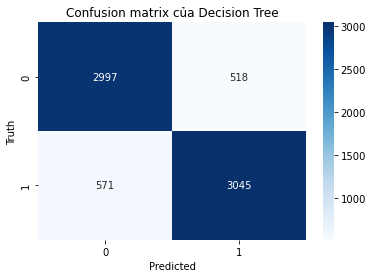

In [74]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix của Decision Tree')
plt.show()

## 4.2 Random Forest

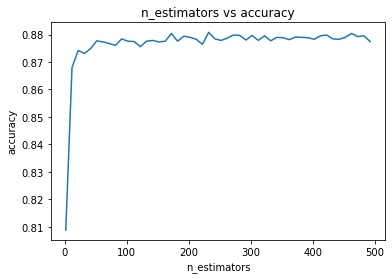

n_estimators =  232


In [76]:
# thiết lập tìm n_estimators tốt nhất
n_estimators = range(2, 500, 10)
accuracies = []
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(n_estimators, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('n_estimators vs accuracy')
plt.show()

# in ra kết quả n_estimators tốt nhất
print('n_estimators = ', n_estimators[accuracies.index(max(accuracies))])

In [77]:
# Thiết lập RF với các chỉ số tối ưu
n_estimator = n_estimators[accuracies.index(max(accuracies))]
rf = RandomForestClassifier(n_estimators=n_estimator)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.8791193381012481

In [78]:
# chạy 10 lần random forest lấy trung bình dưới dạng %
from sklearn.ensemble import RandomForestClassifier
import random
for i in range(10):
    rf = RandomForestClassifier(n_estimators=n_estimator)
    random_state = random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=random_state, shuffle=True)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    # accuracy
    print('scores: ', accuracy_score(y_test, y_pred)*100)
    print('------------------')

scores:  88.66919085682233
------------------
scores:  87.92595708876736
------------------
scores:  87.98205020333754
------------------
scores:  88.51493479175431
------------------
scores:  87.92595708876736
------------------
scores:  88.37470200532884
------------------
scores:  87.79974758098443
------------------
scores:  88.34665544804375
------------------
scores:  88.03814331790772
------------------
scores:  87.56135184406114
------------------


In [79]:
# random forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3524
           1       0.87      0.89      0.88      3607

    accuracy                           0.88      7131
   macro avg       0.88      0.88      0.88      7131
weighted avg       0.88      0.88      0.88      7131



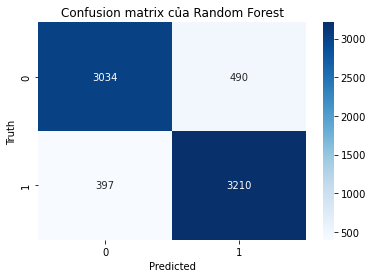

In [80]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix của Random Forest')
plt.show()

# 4.3 logistic regression

In [81]:
# chạy 10 lần logistic regression lấy trung bình dưới dạng %
from sklearn.linear_model import LogisticRegression
import random
for i in range(10):
    lr = LogisticRegression()
    random_state = random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=random_state, shuffle=True)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    # accuracy
    print('scores: ', accuracy_score(y_test, y_pred)*100)
    print('------------------')

scores:  75.47328565418596
------------------
scores:  76.987799747581
------------------
scores:  76.37077548730893
------------------
scores:  74.67395877156079
------------------
scores:  75.96410040667509
------------------
scores:  76.63721778151732
------------------
scores:  74.89833122984155
------------------
scores:  75.58547188332632
------------------
scores:  74.96844762305427
------------------
scores:  76.17444958631327
------------------


In [82]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      3572
           1       0.76      0.76      0.76      3559

    accuracy                           0.76      7131
   macro avg       0.76      0.76      0.76      7131
weighted avg       0.76      0.76      0.76      7131



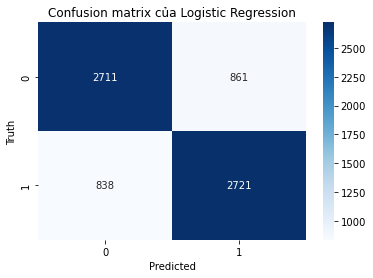

In [83]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix của Logistic Regression')
plt.show()

# 4.4 SVM

In [84]:
# chạy 10 lần với svm lấy trung bình dưới dạng %
from sklearn.svm import SVC
import random
for i in range(10):
    svc = SVC()
    random_state = random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=random_state, shuffle=True)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    # accuracy
    print('scores: ', accuracy_score(y_test, y_pred)*100)
    print('------------------')


scores:  69.82190436123966
------------------
scores:  69.8639741971673
------------------
scores:  69.34511288739307
------------------
scores:  69.82190436123966
------------------
scores:  69.84995091852475
------------------
scores:  68.79820502033375
------------------
scores:  69.5975319029589
------------------
scores:  69.63960173888654
------------------
scores:  69.87799747580985
------------------
scores:  69.35913616603561
------------------


In [85]:
# svm
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      3589
           1       0.66      0.80      0.72      3542

    accuracy                           0.69      7131
   macro avg       0.70      0.69      0.69      7131
weighted avg       0.70      0.69      0.69      7131



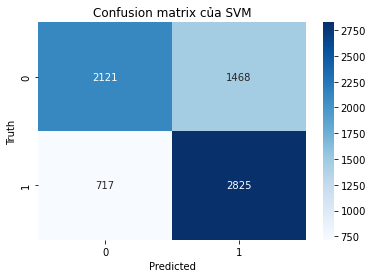

In [86]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix của SVM')
plt.show()

# Lưu mô hình random forest

In [87]:
# đọc dữ liệu
df = pandas.read_csv('Hotel Reservations.csv')

In [44]:
# xử lý imbalanced data 
df_0 = df[df['booking_status'] == 'Canceled']
df_1 = df[df['booking_status'] == 'Not_Canceled']

In [45]:
n_samples = min(df_0.shape[0], df_1.shape[0])
df_0 = df_0.sample(n=n_samples, random_state=42)
df_1 = df_1.sample(n=n_samples, random_state=42)
# concat 2 dataframe
df_ = pandas.concat([df_0, df_1], axis=0)

In [46]:
# lấy X từ cột 1
X = df.drop(['booking_status', 'Booking_ID'], axis=1)
y = df['booking_status']

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [48]:
df.iloc[2]

Booking_ID                                 INN00003
no_of_adults                                      1
no_of_children                                    0
no_of_weekend_nights                              2
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                         1
arrival_year                                   2018
arrival_month                                     2
arrival_date                                     28
market_segment_type                          Online
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                             60.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 2, dty

In [49]:
X.iloc[2]

no_of_adults                                      1
no_of_children                                    0
no_of_weekend_nights                              2
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                         1
arrival_year                                   2018
arrival_month                                     2
arrival_date                                     28
market_segment_type                          Online
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                             60.0
no_of_special_requests                            0
Name: 2, dtype: object

In [50]:
y[:10]

0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
5        Canceled
6    Not_Canceled
7    Not_Canceled
8    Not_Canceled
9    Not_Canceled
Name: booking_status, dtype: object

In [51]:
X.market_segment_type.unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [52]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['room_type_reserved'] = le.fit_transform(X['room_type_reserved'])
# in ra quy luật đánh số của label encoder đối market_segment_type
le.classes_

array(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
       'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], dtype=object)

In [53]:
X['type_of_meal_plan'] = le.fit_transform(X['type_of_meal_plan'])
# in ra quy luật đánh số của label encoder đối type_of_meal_plan
le.classes_

array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
      dtype=object)

In [54]:
X['market_segment_type'] = le.fit_transform(X['market_segment_type'])
# in ra quy luật đánh số của label encoder đối market_segment_type
le.classes_

array(['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online'],
      dtype=object)

In [55]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42, shuffle=True)

In [56]:
y_test

4968     Not_Canceled
34540    Not_Canceled
36108    Not_Canceled
1553         Canceled
24974    Not_Canceled
             ...     
29685    Not_Canceled
1106         Canceled
6810     Not_Canceled
27776        Canceled
4026         Canceled
Name: booking_status, Length: 10883, dtype: object

In [57]:
from sklearn.pipeline import Pipeline
# import label binarizer
from sklearn.preprocessing import LabelBinarizer
# Khởi tạo Min-Max Scaler
scaler = MinMaxScaler()
# Khởi tạo Label Encoder
# label_encoder = LabelEncoder()
# label binarizer

rf = RandomForestClassifier(n_estimators=n_estimator)
# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),                  # Bước Min-Max Scaling
    ('random_forest', rf)      # Bước huấn luyện Random Forest
])

# Huấn luyện pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('random_forest', RandomForestClassifier(n_estimators=132))])

In [58]:
# lưu mô hình
import pickle
pickle.dump(pipeline, open('web\model\model.pkl', 'wb'))